<a href="https://colab.research.google.com/github/Githubmany/Projects/blob/master/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter.... predicting a number.

In [296]:
# Import Tensorflow as tf
import tensorflow as tf
print(tf.__version__)


2.15.0


In [297]:
import numpy as np
import matplotlib.pyplot as plt



In [298]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])



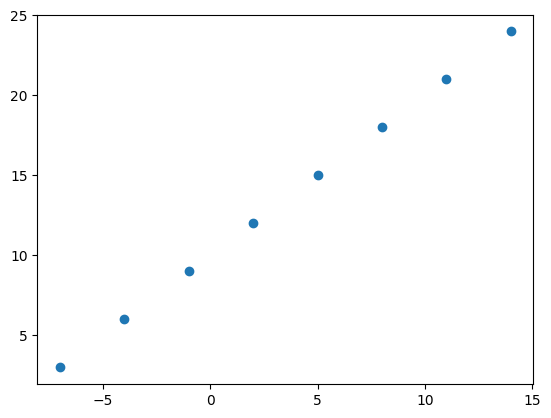

In [299]:
# Visualize it
plt.scatter(X, y);

In [300]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [301]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [302]:
X[0], y[0]

(-7.0, 3.0)

In [303]:
X[1], y[1]

(-4.0, 6.0)

In [304]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [305]:
X[0].ndim

0

In [306]:
X[0], y[0]

(-7.0, 3.0)

In [307]:
# Turn our Numpy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [308]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape


(TensorShape([]), TensorShape([]))

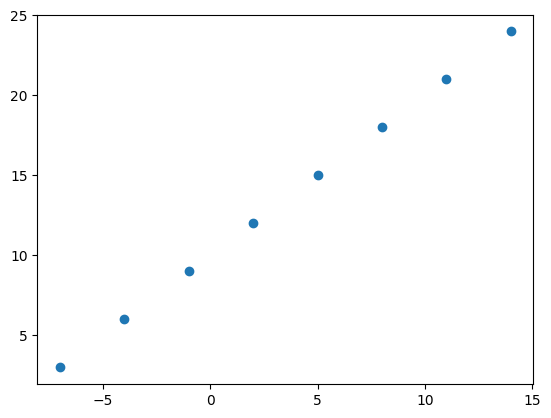

In [309]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer ( (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model **- letting the model try to find patterns between X and y (features and labels)

In [310]:
# Set random seed
X = np.expand_dims(X, axis=-1)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),  # sgd is short for stochastic
              metrics=["mae"])

# 3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 536ms/step - loss: 15.2704 - mae: 15.2704
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 14.9891 - mae: 14.9891
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 14.7978 - mae: 14.7978
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 14.6653 - mae: 14.6653
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 14.5328 - mae: 14.5328


In [311]:
# Check out X and y
X, y

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [312]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 109ms/step


array([[-4.5462666]], dtype=float32)

In [313]:
y_pred + 11

array([[6.4537334]], dtype=float32)

## improving our model

We can improve our model by altering the steps we took to create a model; by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of the hidden layers (all called neurons), change the activation function of each layer
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [314]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 383ms/step - loss: 12.1768 - mae: 12.1768
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 12.0443 - mae: 12.0443
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.9118 - mae: 11.9118
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7793 - mae: 11.7793
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6468 - mae: 11.6468
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 11.5143 - mae: 11.5143
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.3818 - mae: 11.3818
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2493 - mae: 11.2493
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 11.1168 - mae: 11.1168
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9843 - mae: 10.9843
Epoch 11/100
1/1 [==============================

In [315]:
# Remind ourselves of the data
X,y

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [316]:
# Let's see if our model's prediction has improved.
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[29.882067]], dtype=float32)

In [317]:
# Let's see if we can make another to improve our model

# 1. Create the model  (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])




In [318]:
# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 601ms/step - loss: 13.3013 - mae: 13.3013
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6225 - mae: 12.6225
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.9387 - mae: 11.9387
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2482 - mae: 11.2482
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5494 - mae: 10.5494
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8401 - mae: 9.8401
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1174 - mae: 9.1174
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3784 - mae: 8.3784
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6204 - mae: 7.6204
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8405 - mae: 6.8405
Epoch 11/100
1/1 [==============================] - 0s 10m

In [319]:
# Let's remind ourselves of the data
X, y

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32),
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [320]:
# Let's try and make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[27.423826]], dtype=float32)

Evaluating a model

In practice, a typical workflow you will go through when building a neural network is:

Build a model  -> fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it ->evaluate it ...

When it comes to evaluation....there are 3 words you should memorize:
>  "Visualize, visualize, visualize"

It is a good idea to visualize:
* The data - what data are you working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [321]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [322]:
# Make labels for the dataset
y = X + 10
y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

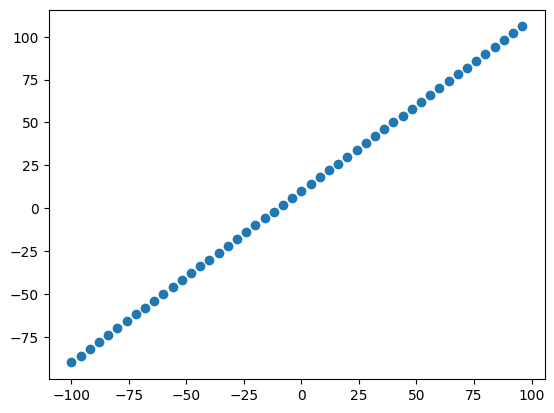

In [323]:

# Visualize the data
import matplotlib.pyplot as plt


plt.scatter(X, y)

### The sets....

* **Training set** - the model learns from this data, which is
typically 70-80% of the total data you have available.
* **Validation set** - the model get tuned on this data,
which is typically 10 - 15% of the available data.
* **Test set** - the model gets evaluated on this data to test
what it has learned, this set is typically 10 - 15% of the total data available.

In [324]:
# Check the length of how many samples we have
len(X)

50

In [325]:
# Set the data into train and tests sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in traning and test sets...  let us visualize it again!

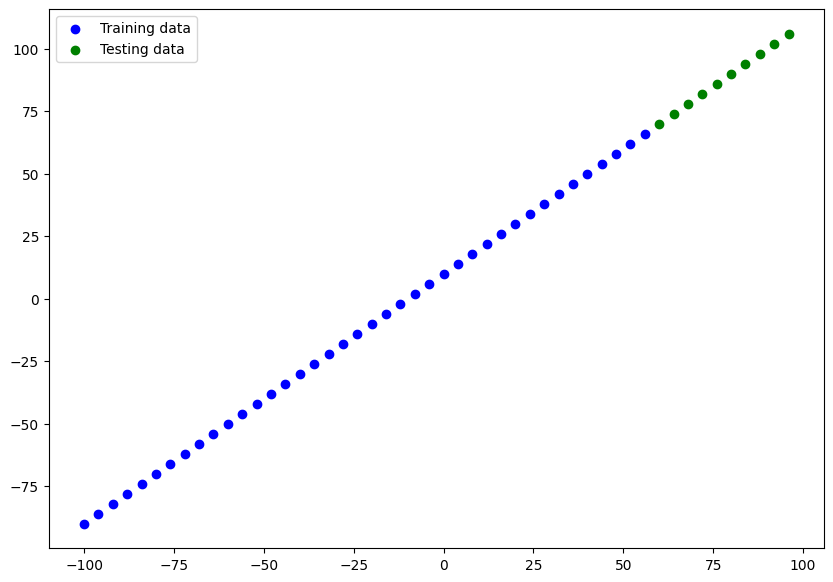

In [326]:
plt.figure(figsize = (10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training data") # our model will learn on this
# PLot test data in green
plt.scatter(X_test, y_test, c = "g", label = "Testing data") # want our model to be able to predict this (given X, what is y?)
plt.legend();

In [327]:
# Let us have a look at how to build a neural network for our data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)


### Visualizing the model




In [328]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [329]:
# Let us create a model which builds automaticallyby defining the input_shape argument in the first place
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile a model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📚 **Resource:** For more in-depth overview of the trainable parameters with
within a layer, check out **[MIT's introduction to deep learning video](https://)**.

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and
trainable) by calling 'model.summary()'.



In [330]:
# Let us fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [331]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


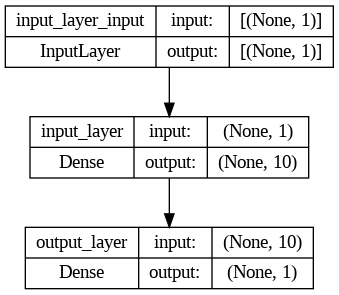

In [332]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it is a good idea to plot them
against the ground truth labels.

Often you will see this in the form of y_test or y_true versus y_pred (ground truth versus your model)



In [333]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 76.32637 ],
       [ 81.29994 ],
       [ 86.273506],
       [ 91.24708 ],
       [ 96.220634],
       [101.19421 ],
       [106.16777 ],
       [111.14135 ],
       [116.11491 ],
       [121.08848 ]], dtype=float32)

In [334]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you are going to reuse some kind of functionality in the future, it is a good idea to turn it into a function.



In [335]:
# Let us create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """
  Plots training data, test data and compares predictionsto ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training_data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing_data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();



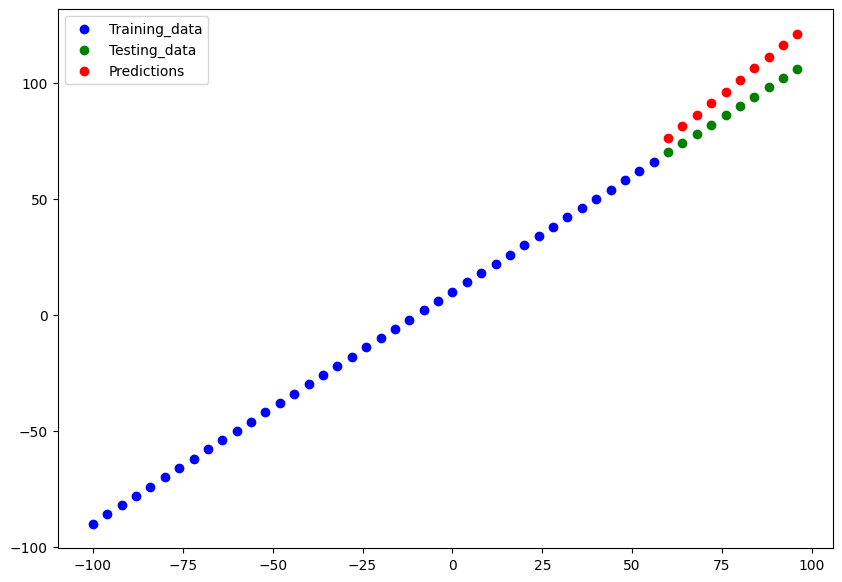

In [336]:
plot_predictions()


## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different
evaluation metrics to evaluate your model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of
my model's predictions.
* MSE - mean square error, "square the average errors"



In [337]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 10.7074 - mae: 10.7074


[10.707426071166992, 10.707426071166992]

In [338]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred = tf.squeeze(y_pred))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=10.707424>

In [339]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.32637 ],
       [ 81.29994 ],
       [ 86.273506],
       [ 91.24708 ],
       [ 96.220634],
       [101.19421 ],
       [106.16777 ],
       [111.14135 ],
       [116.11491 ],
       [121.08848 ]], dtype=float32)>

In [340]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [341]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.32637 ,  81.29994 ,  86.273506,  91.24708 ,  96.220634,
       101.19421 , 106.16777 , 111.14135 , 116.11491 , 121.08848 ],
      dtype=float32)>

In [342]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.707424>

In [343]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=122.46855>

In [344]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

  def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn more patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this may come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let us do 3 modelling experiments:

1. `model_1` - same as the original model, 1layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**


In [345]:
# Set random seed
tf.random.set_seed(42)




In [346]:
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)), # Change input shape to (1,)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 107.3103 - mae: 107.3103
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 71.8549 - mae: 71.8549
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 34.3218 - mae: 34.3218
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6804 - mae: 7.6804
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2020 - mae: 9.2020
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6657 - mae: 8.6657
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0910 - mae: 9.0910
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1183 - mae: 9.1183
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.9960 - mae: 19.9960
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8289 - mae: 10.8289
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 86ms/step


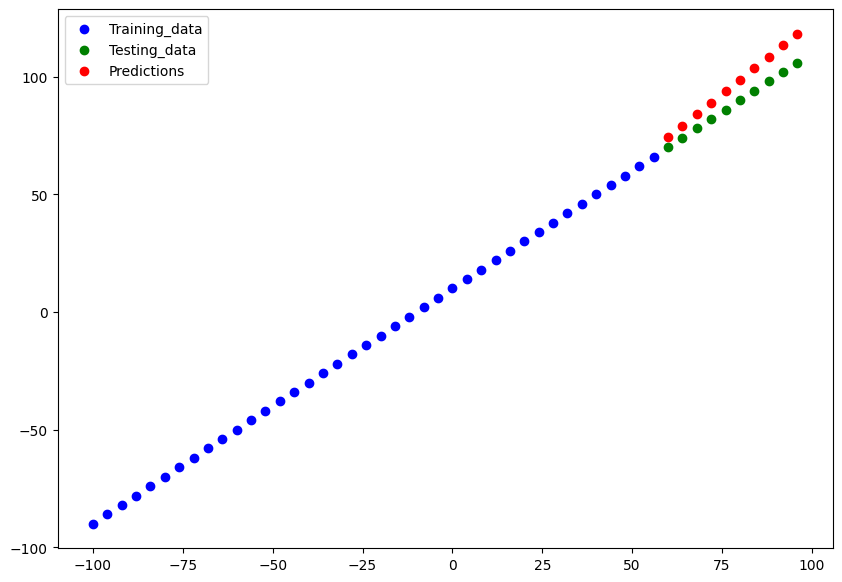

In [347]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [348]:
# Import the necessary module for the 'mse' function
from tensorflow.keras.metrics import mean_squared_error as mse

In [349]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.298257>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 317.78992,  208.69247,  147.08832,  132.97748,  166.3599 ,
         247.2355 ,  375.60446,  551.46674,  774.8221 , 1045.6709 ],
       dtype=float32)>)

**Build ` model_2 `**

* 2 dense layers, trained for 100 epochs



In [350]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),  # Change input shape to (1,)
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 21.6736 - mse: 709.6509
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 21.9338 - mse: 614.2363
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 28.1513 - mse: 1152.9447
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 23.3679 - mse: 787.8145
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9438 - mse: 236.7000
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1602 - mse: 138.7177
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.1484 - mse: 187.5845
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8662 - mse: 134.9716
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 37.6939 - mse: 2192.5884
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 25.3282 - mse: 900.2165
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 134ms/step


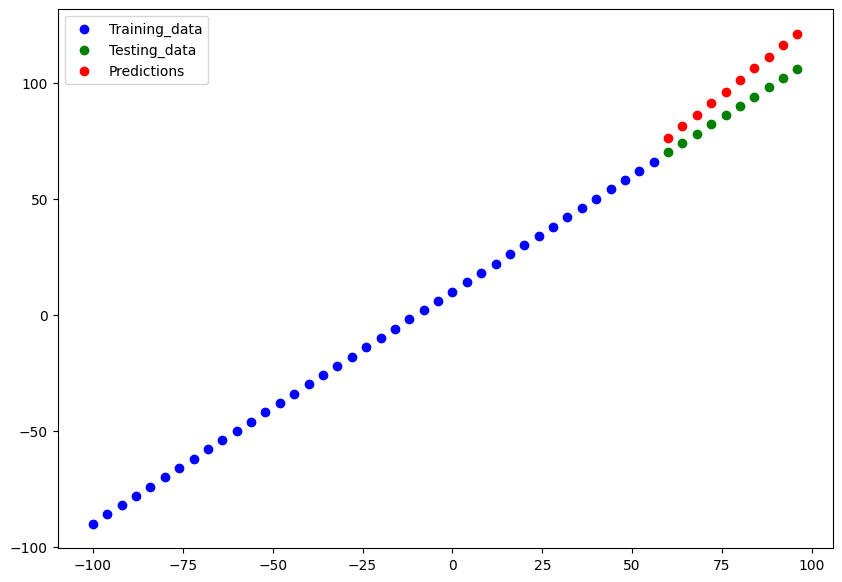

In [351]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [352]:
# Calculate  model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.6961155>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 268.5481 ,  177.04703,  135.0208 ,  142.46924,  199.3923 ,
         305.78986,  461.66302,  667.0091 ,  921.83203, 1226.1285 ],
       dtype=float32)>)

**Build `model_3` **
* 2 layers, trained for 500 epochs



In [353]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.optimizers.SGD(),
                metrics=["mae"])

In [354]:
# Import the necessary libraries
import numpy as np

In [355]:
# Reshape X_train to a 2D array
X_train_reshaped = np.array(X_train).reshape(-1, 1)

# 3. Fit the model
model_3.fit(X_train_reshaped, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 15ms/step - loss: 28.5134 - mae: 28.5134
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 25.9791 - mae: 25.9791
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 29.6982 - mae: 29.6982
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 16.2432 - mae: 16.2432
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 22.3991 - mae: 22.3991
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 11.1223 - mae: 11.1223
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.1665 - mae: 12.1665
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.9609 - mae: 10.9609
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 38.3172 - mae: 38.3172
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 25.8557 - mae: 25.8557
Epoch 11/500
2/2 [==============================] 

1/1 [==============================] - 0s 81ms/step


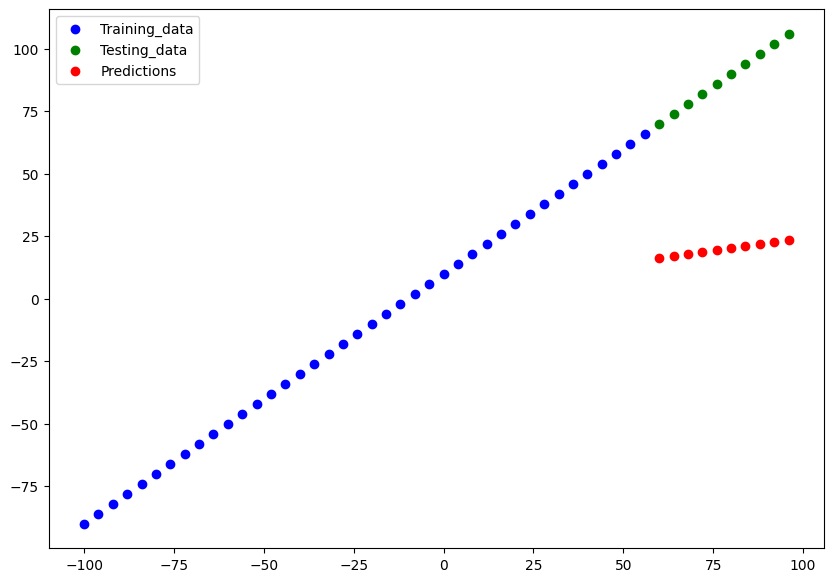

In [356]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [357]:
# Calculate model_3 evaluation metrics
ma3_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

# Assign the value of ma3_3 to mae_3
mae_3 = ma3_3

# Print the values of mae_3 and mse_3
print(mae_3, mse_3)

tf.Tensor(68.062, shape=(), dtype=float32) tf.Tensor(
[5263.8687 5150.675  5038.742  4928.0723 4818.665  4710.5205 4603.6367
 4498.0166 4393.6587 4290.5625], shape=(10,), dtype=float32)


🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We have a few experiments, let's compare the results.



In [358]:
# Let us compare our model's results using pandas Dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.298257,"[317.78992, 208.69247, 147.08832, 132.97748, 1..."
1,model_2,10.696115,"[268.5481, 177.04703, 135.0208, 142.46924, 199..."
2,model_3,68.061996,"[5263.8687, 5150.675, 5038.742, 4928.0723, 481..."


Looks like model_2 performed the best...


In [359]:
model_2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                20        
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑**Note:** One of your main goals should be to minimize
the time between your experiments. The more experiments you do, the more things you will figure out which do not work and in turn, get closer to figuring out what does work. Remember
the machine learning practitioner's motto: "experiment, experiment, experiment".



## Tracking your experiments

One really good habit in machine learning modelling is to
track the results of your experiments.

And when doing so, it can be tedious if you are running lots
of experiments.

Luckily, they are tools to help us!

📖 **Resource:** As you build more models, you will want to look into using:

* TensorBoard - a component of the TensorFlow library
to help track modelling experiments (we will see this one later).
* Weights and Biases - a tool for tracking all kinds of
machine learning experiments (plugs straight into Tensorboard).



## Saving our models

Saving models allows us to use them outside Google Colab (or whereever they were trained) such as in a web application or a mobile app.
There are two main formats we can save our model's too:

1. The SaveModel format
2. The HDF5 format



In [360]:
# Save model using the SaveModel format
model_2.save("best_model_SaveModel_format")

# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

# Loading in a saved model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format")
loaded_SavedModel_format.summary()

# Compare model_2 predictions with SaveModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                20        
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 83ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [361]:
# Compare the MAE of model_2_preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [362]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                20        
                                                                 
 dense_70 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [363]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 87ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## ## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You go to the "file" tab and right-click on the file you are after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below)

In [364]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [365]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course/

In [366]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_HDF5_format.h5


## A larger example

In [367]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [368]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [369]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [370]:
# Create X and y values (features and labels)

In [371]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [372]:
# View X

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [373]:
# View y

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [374]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [375]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# Fit the model
# Convert X_train to a tensor
X_train_tensor = tf.convert_to_tensor(X_train.astype(np.float32))

# Fit the model with the converted X_train
insurance_model.fit(X_train_tensor, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8646.4775 - mae: 8646.4775
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7889.5923 - mae: 7889.5923
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7581.8301 - mae: 7581.8301
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7733.6299 - mae: 7733.6299
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7719.7959 - mae: 7719.7959
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.7476 - mae: 7593.7476
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7576.9482 - mae: 7576.9482
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7794.2402 - mae: 7794.2402
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7592.7314 - mae: 7592.7314
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7729.7695 - mae: 7729.7695

In [376]:
# Check the results of the results of the insurance model on the test data
# Convert X_test to a tensor
X_test_tensor = tf.convert_to_tensor(X_test.astype(np.float32))

# Check the results of the results of the insurance model on the test data
insurance_model.evaluate(X_test_tensor, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7178.7271 - mae: 7178.7271


[7178.72705078125, 7178.72705078125]

In [377]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well.... let's try and improve it!

To (try) improve our model, we will run 2 experiments

# 1. Add an extra layer with more hidden units and use the Adam optimizer
# 2. Same as above but train for longer (200 epochs)
# 2. (insert your own experiment here)



In [378]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2        True     False       True       False   
 1285   47  24.320         0        True     False       True       False   
 1142   52  24.860         0        True     False       True       False   
 969    39  34.320         5        True     False       True       False   
 486    54  21.470         3        True     False       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4        True     False       True       False   
 1130   39  23.870         5        True     False       True       False   
 1294   58  25.175         0       False      True       True       False   
 860    37  47.600         2        True     False      False        True   
 1126   55  29.900         0       False      True       True       False   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [379]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])



In [380]:
# Convert X_train and y_train to floats
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)


# 3. Fit the model with the converted y_train
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13272.3115 - mae: 13272.3115
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13078.1797 - mae: 13078.1797
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12660.8721 - mae: 12660.8721
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 11859.2412 - mae: 11859.2412
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10593.3154 - mae: 10593.3154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9108.0635 - mae: 9108.0635
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7905.4580 - mae: 7905.4580
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7478.8623 - mae: 7478.8623
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7420.2358 - mae: 7420.2358
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7400.1289 - mae:

In [381]:
# Evaluate the larger model
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4698.5708 - mae: 4698.5708


[4698.57080078125, 4698.57080078125]

In [382]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7178.7271 - mae: 7178.7271


[7178.72705078125, 7178.72705078125]

In [383]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])



In [384]:
# 1. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13289.5771 - mae: 13289.5771
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13114.1123 - mae: 13114.1123
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12743.1943 - mae: 12743.1943
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12037.1318 - mae: 12037.1318
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10886.4248 - mae: 10886.4248
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9442.2939 - mae: 9442.2939
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8135.6616 - mae: 8135.6616
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7520.8335 - mae: 7520.8335
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7421.6841 - mae: 7421.6841
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7402.0264 - mae:

In [385]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3495.7896 - mae: 3495.7896


[3495.78955078125, 3495.78955078125]

In [386]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7178.7271 - mae: 7178.7271


[7178.72705078125, 7178.72705078125]

Text(0.5, 0, 'epochs')

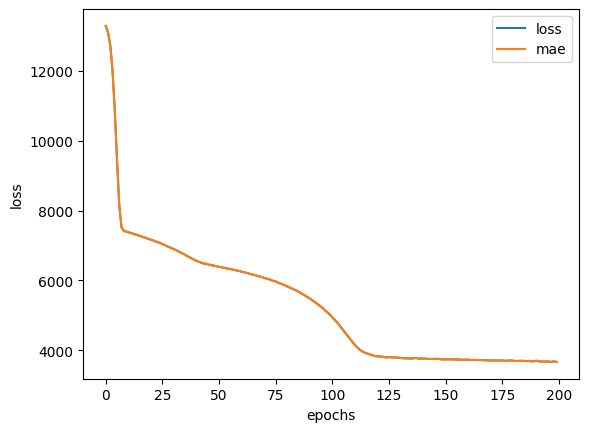

In [387]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends. Really...  it depends on the problem you are working on. However, many people have asked this question before ..... so TensorFlow has a solution! It is called the EarlyStopping Callback] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.



## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on which to use, you could try both and see which performs better.

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [396]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  #turn all values in these columns between 0 and 1.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to out training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [397]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [401]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [403]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normilized and one hot coded.
Now let us build a neural network model on it and see how it goes.



In [404]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13344.8291 - mae: 13344.8291
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13336.9434 - mae: 13336.9434
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13316.0605 - mae: 13316.0605
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13270.7949 - mae: 13270.7949
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.8438 - mae: 13189.8438
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13062.3965 - mae: 13062.3965
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12878.3984 - mae: 12878.3984
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12627.8369 - mae: 12627.8369
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12300.5889 - mae: 12300.5889
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11893.29

In [405]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3437.4036 - mae: 3437.4036


[3437.403564453125, 3437.403564453125]

In [392]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

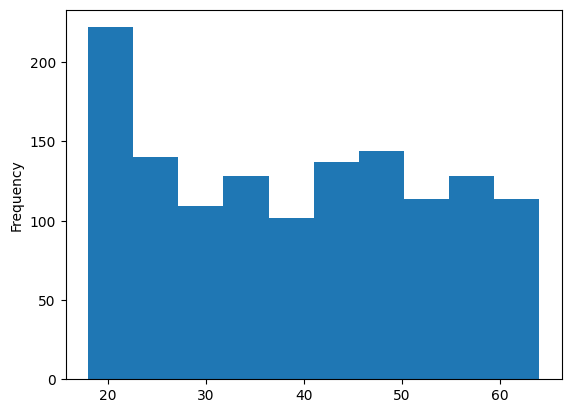

In [389]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

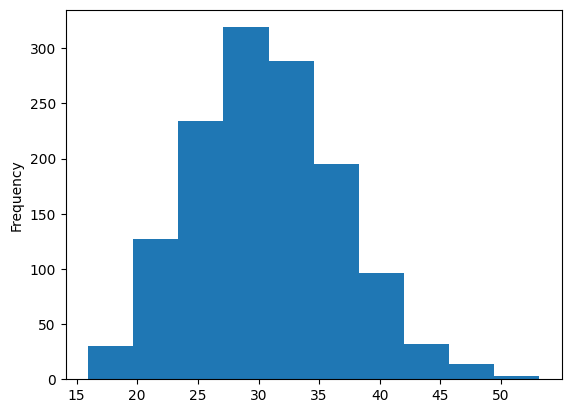

In [390]:
X["bmi"].plot(kind="hist")

In [391]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64